# Wine clasification

This notebook looks at wine clasification here we will predict the qualaty of the wine using the featuers 
using superviced learning, the performance should be messured by using accuracy score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('winequalityN.csv')
print(df.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

Since Type is a word we transforit in to 1 and 0


In [3]:
df.replace({'white': 1, 'red': 0}, inplace=True)

C:\Users\Jesper Kristensen\AppData\Local\Temp\ipykernel_31968\2658418495.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'white': 1, 'red': 0}, inplace=True)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
type,6497.0,0.753886,0.430779,0.00000,1.00000,1.00000,1.00000,1.00000
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000


Checking each feature for null values


In [6]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Impute missing values dding mean when null


In [7]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print(df.isnull().sum())

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Plotting histograms to look for outlayers, since lack of domain knollage i can only asume a high jup would be a outlyer value

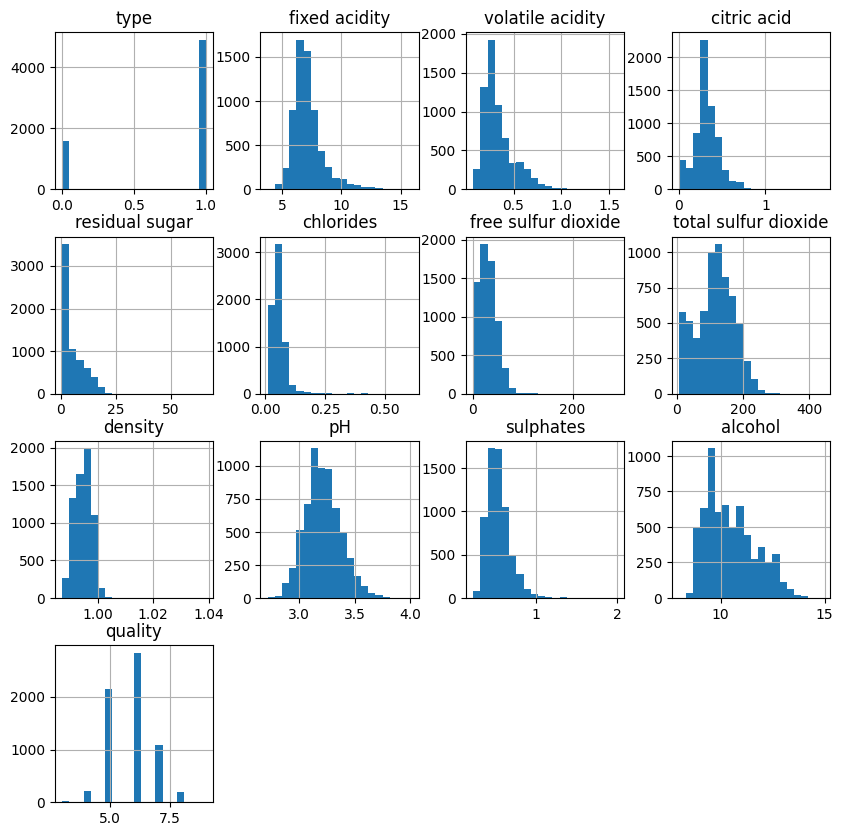

In [8]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

Lokking if Alcohol precentage is equvilant with qualaty

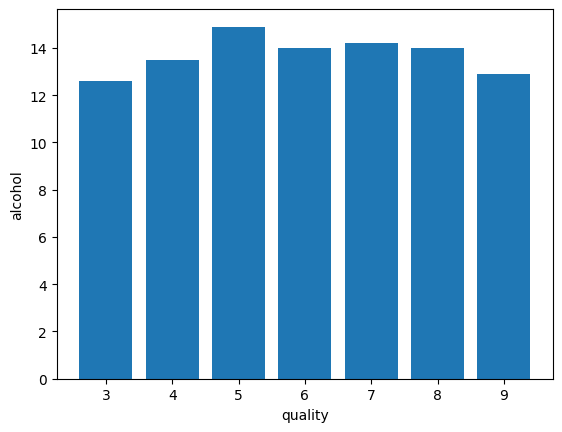

In [9]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

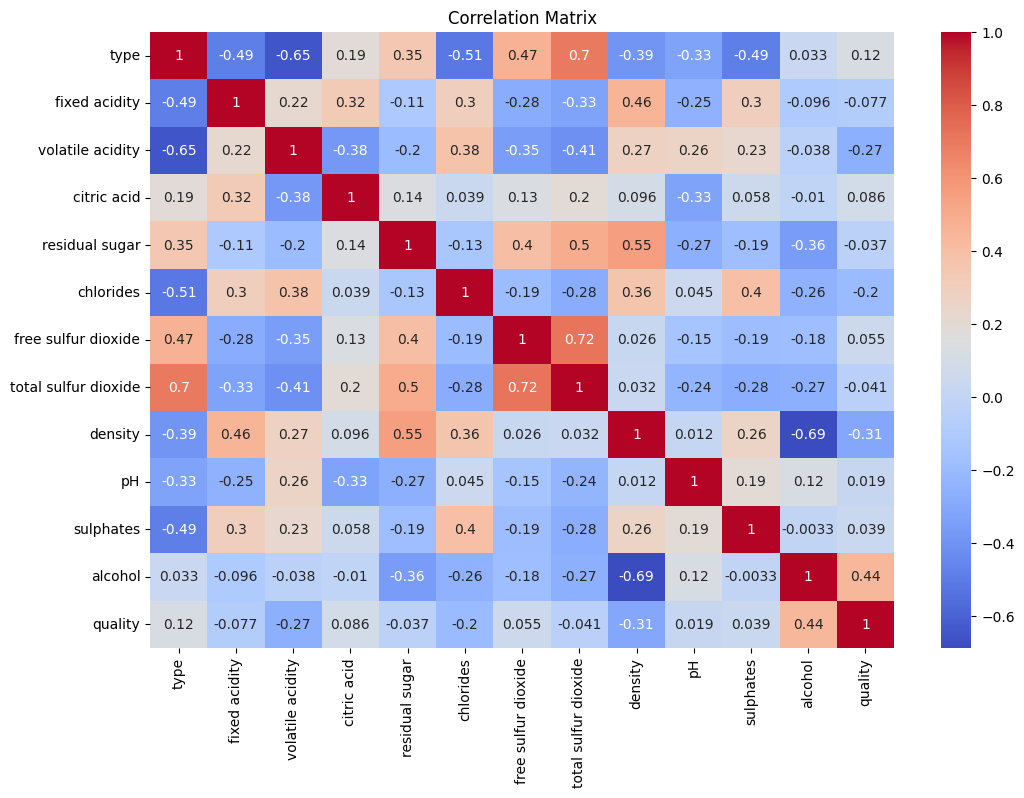

In [10]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

Since total sulfer is equivalent to free sulfer we drop total sulfer since the data are still pressent and there are a feature less, that can intrduce discrubtencis

In [11]:
df = df.drop('total sulfur dioxide', axis=1)

In [12]:
features_pca = df.copy()

Setting up test data and defining target

In [13]:
features = df.drop(['quality'], axis=1)
target = df['quality']

xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=40)


xtrain.shape, xtest.shape

((5197, 11), (1300, 11))

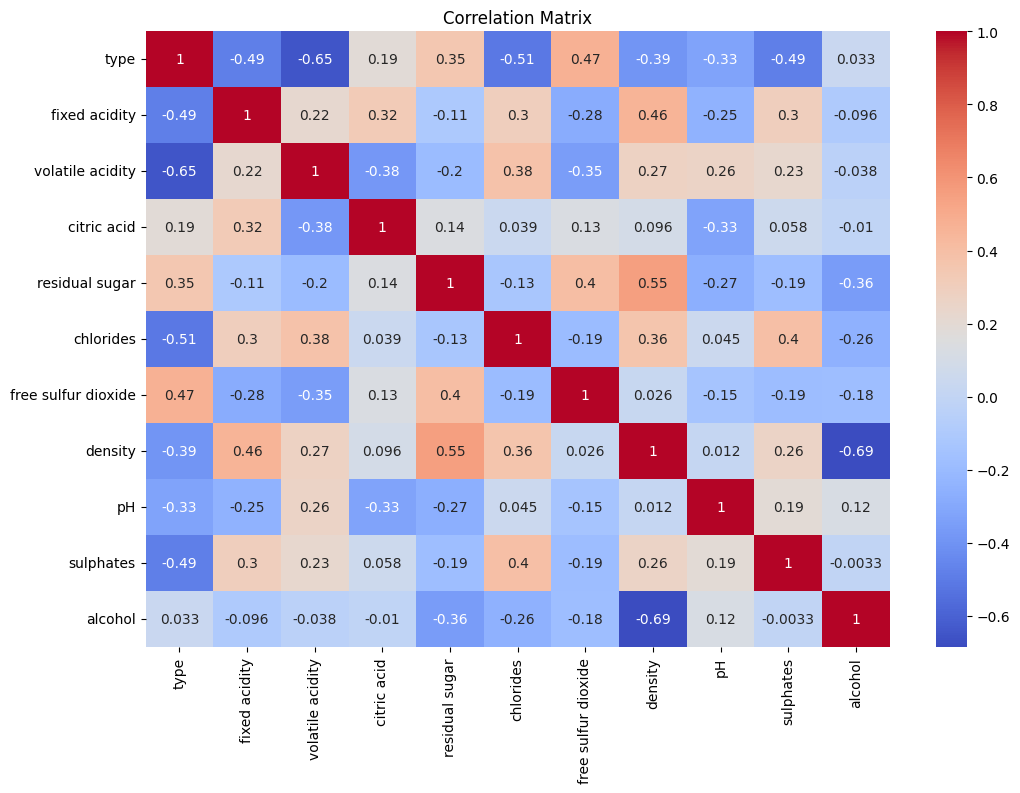

In [14]:
corr_matrix = features.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


In [15]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

Running the models

In [16]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
ytrain_encoded = label_encoder.fit_transform(ytrain)
ytest_encoded = label_encoder.transform(ytest)

models = [LogisticRegression(max_iter=1000), RidgeClassifierCV(), KNeighborsClassifier()]

for model in models:
    model.fit(xtrain, ytrain_encoded)
    print(f'{model} : ')
    print('Training Accuracy : ', accuracy_score(ytrain_encoded, model.predict(xtrain)))
    print('Validation Accuracy : ', accuracy_score(ytest_encoded, model.predict(xtest)))
    print()

    print(classification_report(ytest_encoded, model.predict(xtest)))
    plt.show()


LogisticRegression(max_iter=1000) : 
Training Accuracy :  0.5399268808928228
Validation Accuracy :  0.5223076923076924

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.03      0.05        39
           2       0.59      0.57      0.58       429
           3       0.49      0.73      0.59       555
           4       0.48      0.12      0.20       227
           5       0.00      0.00      0.00        42
           6       0.00      0.00      0.00         2

    accuracy                           0.52      1300
   macro avg       0.37      0.21      0.20      1300
weighted avg       0.52      0.52      0.48      1300

RidgeClassifierCV() : 
Training Accuracy :  0.5366557629401578
Validation Accuracy :  0.5207692307692308

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        39
           2  

C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-pa

Training Accuracy :  0.7013661727919954
Validation Accuracy :  0.5323076923076923

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.31      0.13      0.18        39
           2       0.56      0.62      0.59       429
           3       0.54      0.61      0.57       555
           4       0.47      0.36      0.41       227
           5       0.25      0.05      0.08        42
           6       0.00      0.00      0.00         2

    accuracy                           0.53      1300
   macro avg       0.30      0.25      0.26      1300
weighted avg       0.51      0.53      0.52      1300



C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-pa

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(xtrain.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(ytrain_encoded)), activation='softmax'))  # Use softmax for multi-class classification
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(xtrain, ytrain_encoded, epochs=100, batch_size=32, validation_data=(xtest, ytest_encoded))


y_pred = model.predict(xtest)
y_pred_classes = np.argmax(y_pred, axis=1)


print('Training Accuracy : ', accuracy_score(ytrain_encoded, np.argmax(model.predict(xtrain), axis=1)))
print('Validation Accuracy : ', accuracy_score(ytest_encoded, y_pred_classes))


Epoch 1/100


C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4046 - loss: 1.5368 - val_accuracy: 0.4862 - val_loss: 1.1835
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4883 - loss: 1.1836 - val_accuracy: 0.5169 - val_loss: 1.1306
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5095 - loss: 1.1553 - val_accuracy: 0.5177 - val_loss: 1.1108
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5181 - loss: 1.1361 - val_accuracy: 0.5254 - val_loss: 1.1063
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5246 - loss: 1.1318 - val_accuracy: 0.5131 - val_loss: 1.1100
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5263 - loss: 1.1078 - val_accuracy: 0.5200 - val_loss: 1.1002
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5296 - loss: 1.0895 - val_accuracy: 0.5231 - val_loss: 1.0876
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5411 - loss: 1.0944 - val_accuracy: 0.5277

Looking into PCA

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df['quality'] = df['quality'].astype('category').cat.codes
target = df['quality']


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_pca)

# Perform PCA
pca = PCA(n_components=2)  
pca_df = pca.fit_transform(X_scaled)

This plot shows 2 closters with all qualatys in each cluster

the 2 clusteres comes from White and Red wine

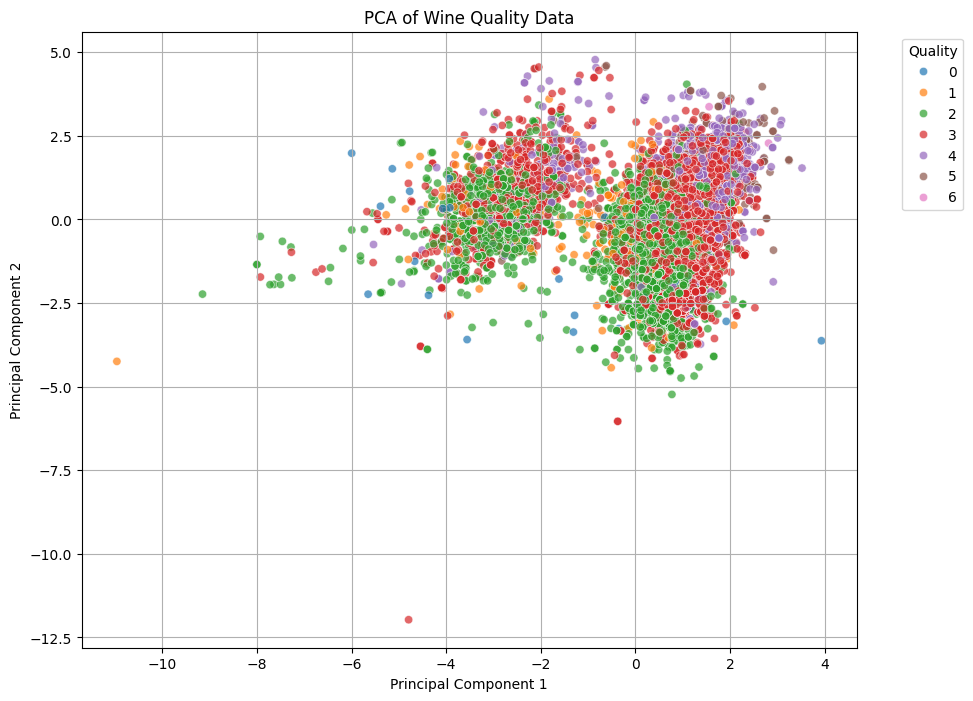

In [19]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_df, columns=['Principal Component 1', 'Principal Component 2'])

# Add PCA components to the original DataFrame
df['PCA_1'] = pca_df['Principal Component 1']
df['PCA_2'] = pca_df['Principal Component 2']

# Plot the PCA components
plt.figure(figsize=(10, 8))
sb.scatterplot(x='PCA_1', y='PCA_2', hue=target, data=df, palette='tab10', alpha=0.7)
plt.title('PCA of Wine Quality Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Finding the most importaint featuers using pca


In [20]:
# Analyze feature contributions for PCA1 and PCA2
PCA1_abs = [abs(number) for number in pca.components_[0]]
PCA1 = pd.DataFrame({
    'Feature Names': features_pca.columns,
    'PCA': pca.components_[0],
    'PCA_abs': PCA1_abs,
})

sorted_df1 = PCA1.sort_values(by='PCA_abs', ascending=False)

PCA2_abs = [abs(number) for number in pca.components_[1]]
PCA2 = pd.DataFrame({
    'Feature Names': features_pca.columns,
    'PCA': pca.components_[1],
    'PCA_abs': PCA2_abs,
})

sorted_df2 = PCA2.sort_values(by='PCA_abs', ascending=False)

# Display top features
print("Top Influential Features for PCA1:")
print(sorted_df1.head())

print("\nTop Influential Features for PCA2:")
print(sorted_df2.head())

Top Influential Features for PCA1:
      Feature Names       PCA   PCA_abs
0              type  0.487324  0.487324
2  volatile acidity -0.396117  0.396117
5         chlorides -0.372321  0.372321
9         sulphates -0.315745  0.315745
1     fixed acidity -0.309608  0.309608

Top Influential Features for PCA2:
          Feature Names       PCA   PCA_abs
10              alcohol  0.479317  0.479317
4        residual sugar -0.478541  0.478541
7               density -0.469876  0.469876
8                    pH  0.281407  0.281407
6   free sulfur dioxide -0.272365  0.272365


In [21]:

important_features = ['type', 'volatile acidity', 'chlorides', 'sulphates', 'fixed acidity',
                      'alcohol', 'residual sugar', 'density', 'pH', 'free sulfur dioxide']


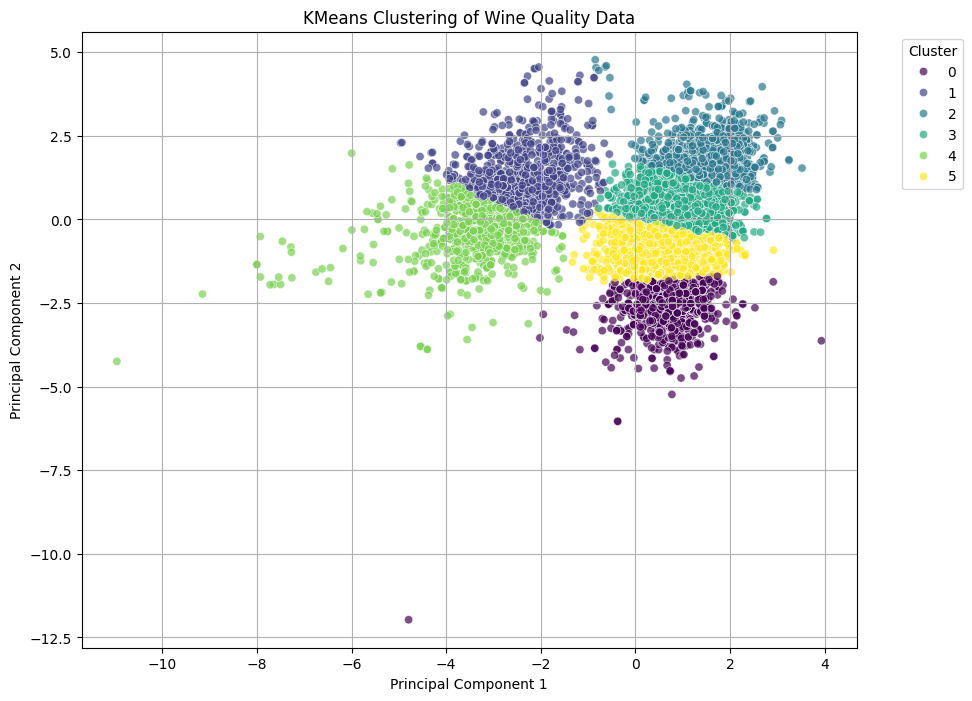

In [22]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca_features = pca.fit_transform(X_scaled)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(pca_features)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 8))
sb.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='viridis', alpha=0.7)
plt.title('KMeans Clustering of Wine Quality Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

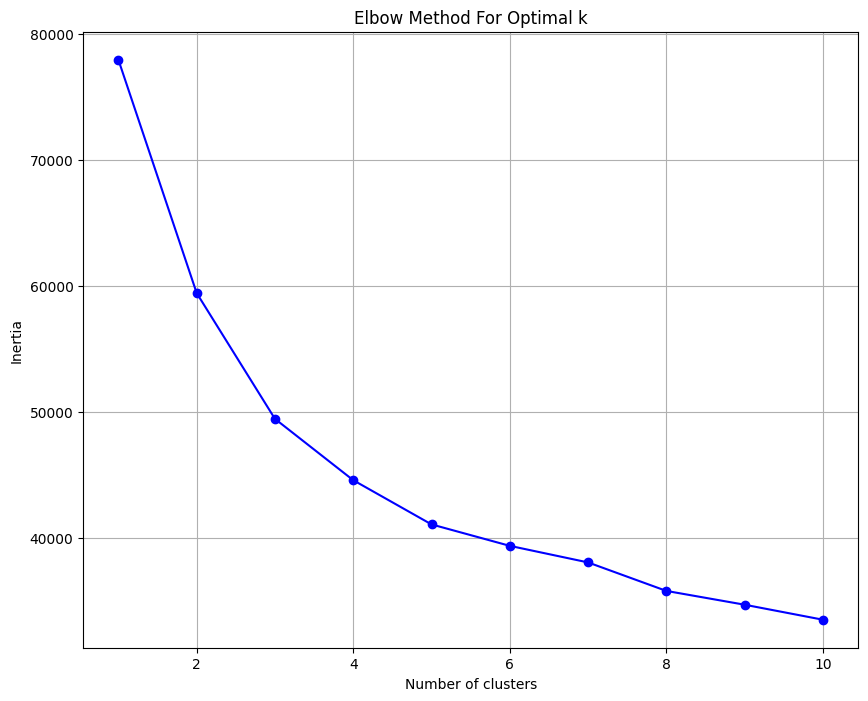

In [23]:
from sklearn.cluster import KMeans

# Elbow Analysis for KMeans Clustering
import matplotlib.pyplot as plt

# Calculate the within-cluster sum of squares (inertia) for different number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 8))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

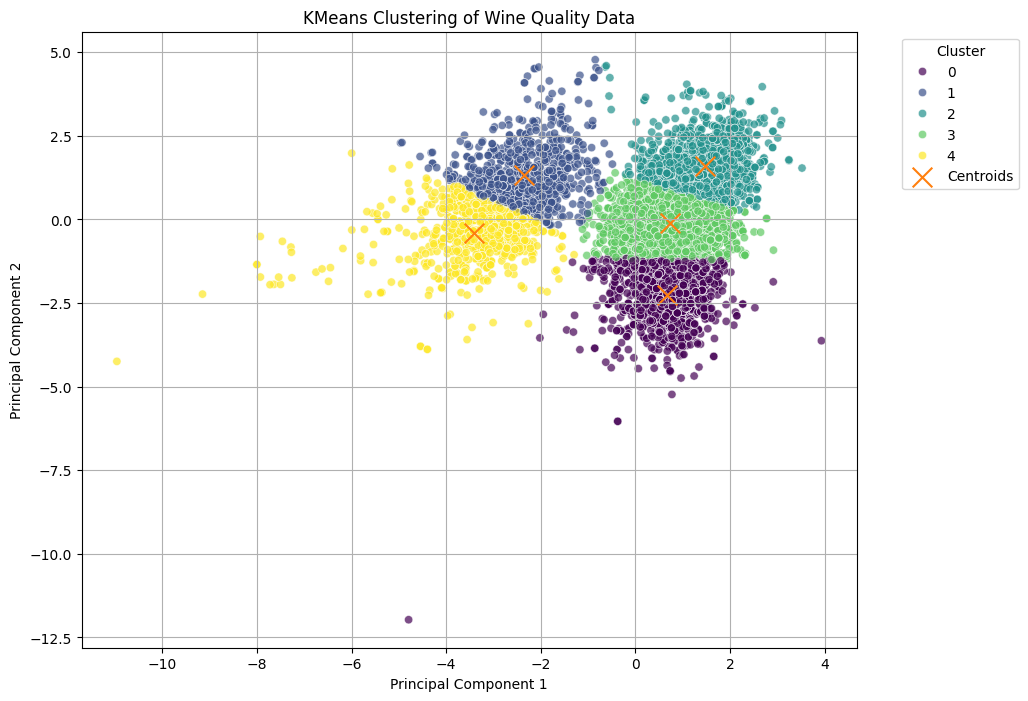

In [24]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_features)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Plot the clusters with centroids
plt.figure(figsize=(10, 8))
sb.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='x', label='Centroids')
plt.title('KMeans Clustering of Wine Quality Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [20.0, 20.0, 53.75, 53.75],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [120.0, 120.0, 142.5, 142.5],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [212.5, 212.5, 243.75, 243.75],
  [173.75, 173.75, 228.125, 228.125],
  [131.25, 131.25, 200.9375, 200.9375],
  [92.5, 92.5, 166.09375, 166.09375],
  [36.875, 36.875, 129.296875, 129.296875],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [275.0, 275.0, 293.75, 293.75],
  [335.0, 335.0, 345.0, 34

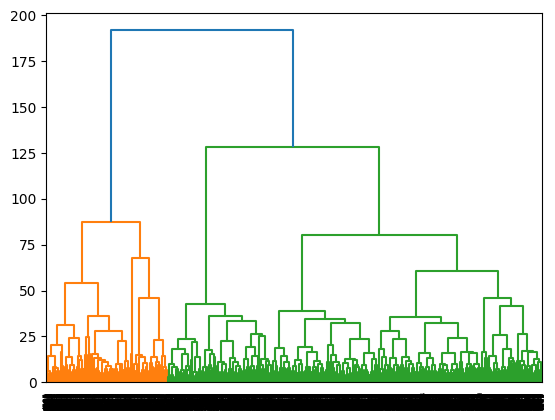

In [25]:
from scipy.cluster.hierarchy import dendrogram, ward
linkage_array = ward(X_scaled)
dendrogram(linkage_array)

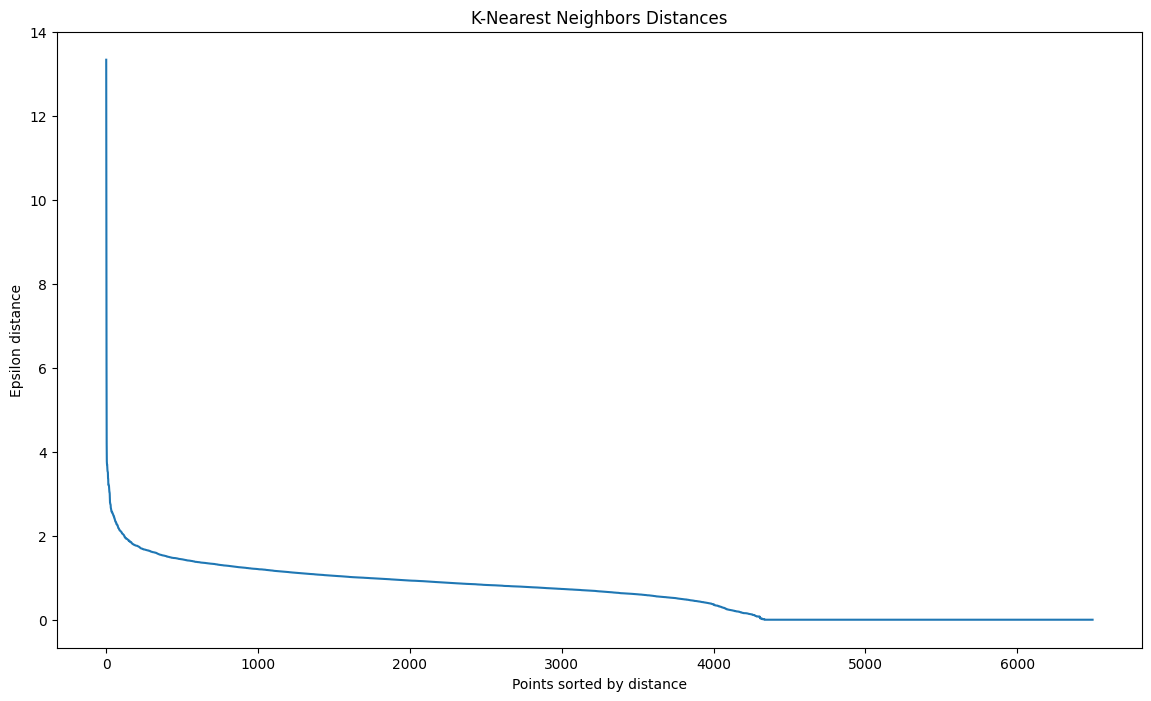

In [26]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=48) 
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)


distances = np.sort(distances, axis=0)[::-1]
distances = distances[:,1]
plt.figure(figsize=(14, 8))
plt.plot(distances)
plt.title('K-Nearest Neighbors Distances')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon distance')
plt.show()

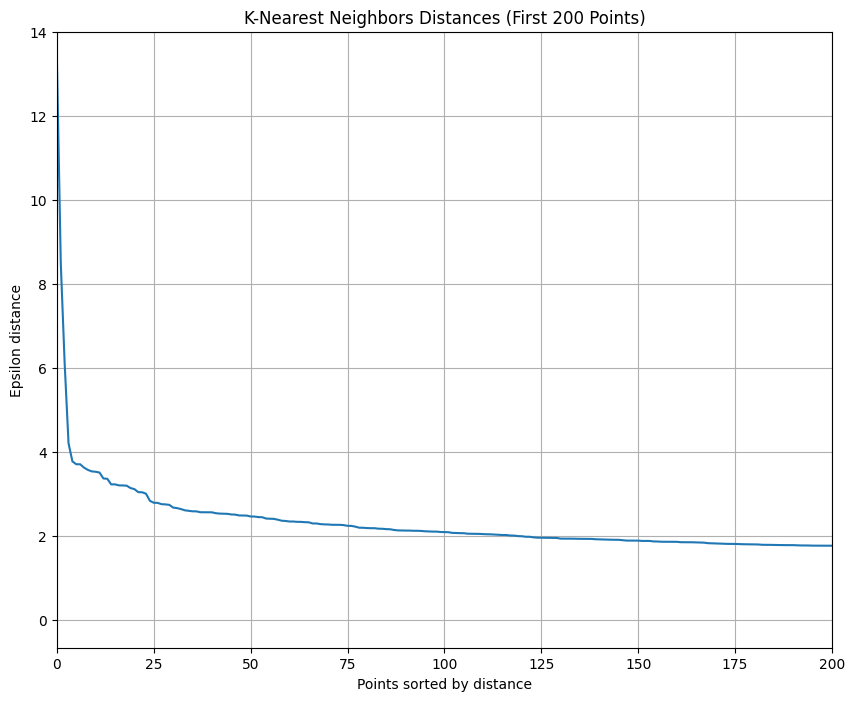

In [27]:
plt.figure(figsize=(10, 8))
plt.plot(distances)
plt.xlim(0, 200)
plt.title('K-Nearest Neighbors Distances (First 200 Points)')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon distance')
plt.grid(True)
plt.show()

In [28]:
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import DBSCAN

eps_values = np.arange(8, 9, 0.1)  
min_samples_values = range(2, 100, 10)  
best_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        if len(set(labels)) > 1:
            score = silhouette_score(X_scaled, labels)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Best parameters were eps={best_params['eps']} and min_samples={best_params['min_samples']}")

Best parameters were eps=8.499999999999998 and min_samples=2


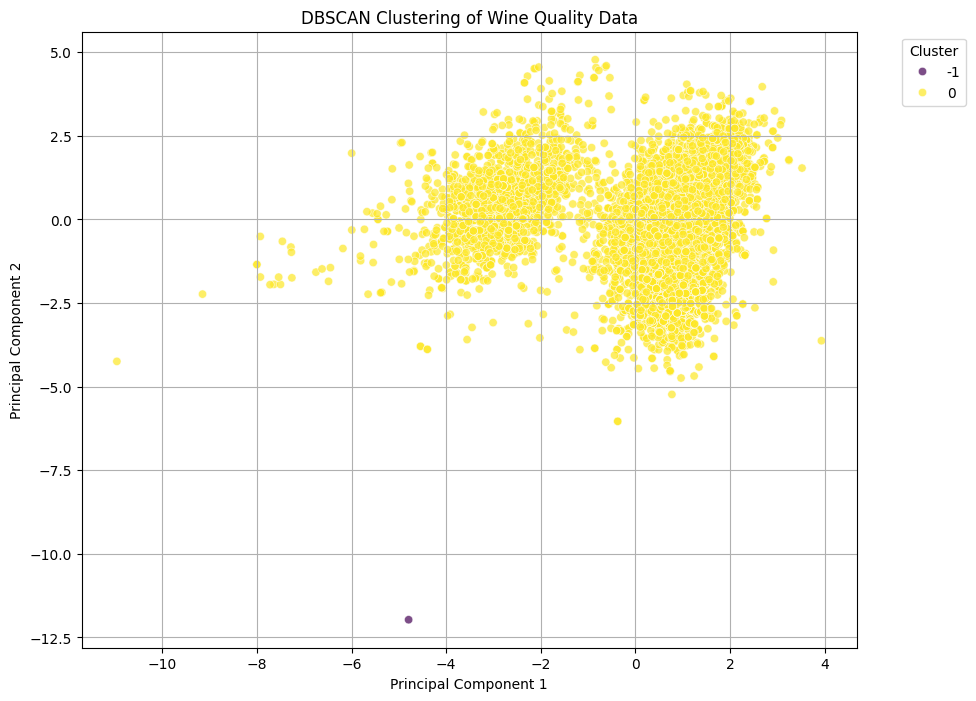

In [29]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=8.5, min_samples=5)
dbscan.fit(X_scaled)


df['DBSCAN_Cluster'] = dbscan.labels_

# Plot the clusters
plt.figure(figsize=(10, 8))
sb.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=dbscan.labels_, palette='viridis', alpha=0.7)
plt.title('DBSCAN Clustering of Wine Quality Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [30]:
# Split the PCA-transformed data into training and testing sets
xtrain_pca, xtest_pca, ytrain_pca, ytest_pca = train_test_split(
    pca_df, target, test_size=0.2, random_state=40)

# Normalize the PCA-transformed data
norm = MinMaxScaler()
xtrain_pca = norm.fit_transform(xtrain_pca)
xtest_pca = norm.transform(xtest_pca)

# Train and evaluate models using the PCA-transformed data
models = [LogisticRegression(max_iter=1000), RidgeClassifierCV(), KNeighborsClassifier()]

for model in models:
    model.fit(xtrain_pca, ytrain_pca)
    print(f'{model} : ')
    print('Training Accuracy : ', accuracy_score(ytrain_pca, model.predict(xtrain_pca)))
    print('Validation Accuracy : ', accuracy_score(ytest_pca, model.predict(xtest_pca)))
    print()

    print(classification_report(ytest_pca, model.predict(xtest_pca)))
    plt.show()

LogisticRegression(max_iter=1000) : 
Training Accuracy :  0.5143351933807966
Validation Accuracy :  0.4969230769230769

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        39
           2       0.55      0.46      0.50       429
           3       0.47      0.77      0.58       555
           4       0.59      0.10      0.17       227
           5       0.00      0.00      0.00        42
           6       0.00      0.00      0.00         2

    accuracy                           0.50      1300
   macro avg       0.23      0.19      0.18      1300
weighted avg       0.49      0.50      0.44      1300

RidgeClassifierCV() : 
Training Accuracy :  0.5024052337887243
Validation Accuracy :  0.4907692307692308

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        39
           2  

C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-pa

Training Accuracy :  0.679622859341928
Validation Accuracy :  0.5523076923076923

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.22      0.15      0.18        39
           2       0.59      0.63      0.61       429
           3       0.55      0.64      0.59       555
           4       0.50      0.37      0.42       227
           5       0.44      0.10      0.16        42
           6       0.00      0.00      0.00         2

    accuracy                           0.55      1300
   macro avg       0.33      0.27      0.28      1300
weighted avg       0.54      0.55      0.54      1300



C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jesper Kristensen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-pa